In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import keras.datasets.mnist as mnist
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.layers import Dense
from keras import models
from keras.models import Sequential
from keras.optimizers import Adadelta,SGD
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.manifold import TSNE
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_test = X_test.reshape(len(X_test),28*28)
X_train = X_train.reshape(len(X_train),28*28)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train,y_train)
y_predict = rf_clf.predict(X_test)

In [6]:
accuracy_score(y_predict,y_test)

0.9675

In [ ]:
param_grid = {
    'max_depth': [80, 90],
    'n_estimators': [50, 60, 70]
}

In [8]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  5.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [9]:
grid_search.best_params_

{'max_depth': 80, 'n_estimators': 70}

In [10]:
y_predict_gridsearchCV = grid_search.best_estimator_.predict(X_test)
y_train_predict_gridsearchCV = grid_search.best_estimator_.predict(X_train)
accuracy_rf = accuracy_score(y_predict_gridsearchCV,y_test)
loss_rf = mean_squared_error(y_predict_gridsearchCV,y_test)
print('Accuracy with GridSearchCV:',accuracy_rf)

Accuracy with GridSearchCV: 0.9696


In [11]:
df=pd.DataFrame(columns=['Model','Training_accuracy','Training_loss','Test_Accuracy','Test_Loss','Validation_accuracy','Validation_loss'])
df.loc[len(df)] = ['Random Forest with Grid SearchCV',accuracy_score(y_train_predict_gridsearchCV,y_train),1-accuracy_score(y_train_predict_gridsearchCV,y_train),accuracy_rf,loss_rf,None,None]
df

,Model,Training_accuracy,Training_loss,Test_Accuracy,Test_Loss,Validation_accuracy,Validation_loss
0,Random Forest with Grid SearchCV,1.0,0.0,0.9696,0.5607,None,None


confusion matrix of Random Forest 
 [[ 973    0    1    0    0    1    2    1    2    0]
 [   0 1122    3    3    0    1    4    0    1    1]
 [   7    0  995    5    4    1    4    9    7    0]
 [   0    0    8  975    0    8    0    9    7    3]
 [   1    0    3    1  952    0    4    1    3   17]
 [   2    0    1   14    4  857    6    1    5    2]
 [   8    3    0    0    4    4  935    0    4    0]
 [   1    2   20    2    2    0    0  990    1   10]
 [   5    0    4    7    3    6    1    4  935    9]
 [   5    4    1   10    8    7    1    5    6  962]] 



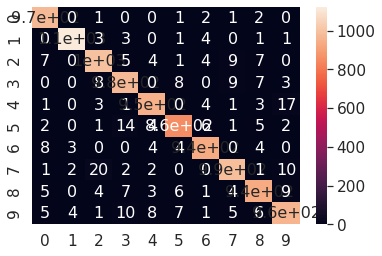

In [12]:
print("confusion matrix of Random Forest \n",confusion_matrix(y_test,y_predict_gridsearchCV),"\n")
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,y_predict_gridsearchCV), annot=True,annot_kws={"size": 16})

2. Using MultiLayer FeedForward Neural Network with 1 hidden layer

In [ ]:
num_classes = 10
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_valid = to_categorical(y_valid,num_classes)

In [14]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=64, 
                 validation_data=(X_valid, y_valid), 
                 epochs=50, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 3s 63us/step - loss: 0.8393 - acc: 0.7869 - val_loss: 0.5081 - val_acc: 0.8718
Epoch 2/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.4421 - acc: 0.8862 - val_loss: 0.3883 - val_acc: 0.8970
Epoch 3/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.3673 - acc: 0.9016 - val_loss: 0.3520 - val_acc: 0.9038
Epoch 4/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.3317 - acc: 0.9089 - val_loss: 0.3183 - val_acc: 0.9125
Epoch 5/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.3013 - acc: 0.9176 - val_loss: 0.3025 - val_acc: 0.9167
Epoch 6/50
48000/48000 [==============================] - 3s 59us/step - loss: 0.2833 - acc: 0.9202 - val_loss: 0.2829 - val_acc: 0.9195
Epoch 7/50
48000/48000 [

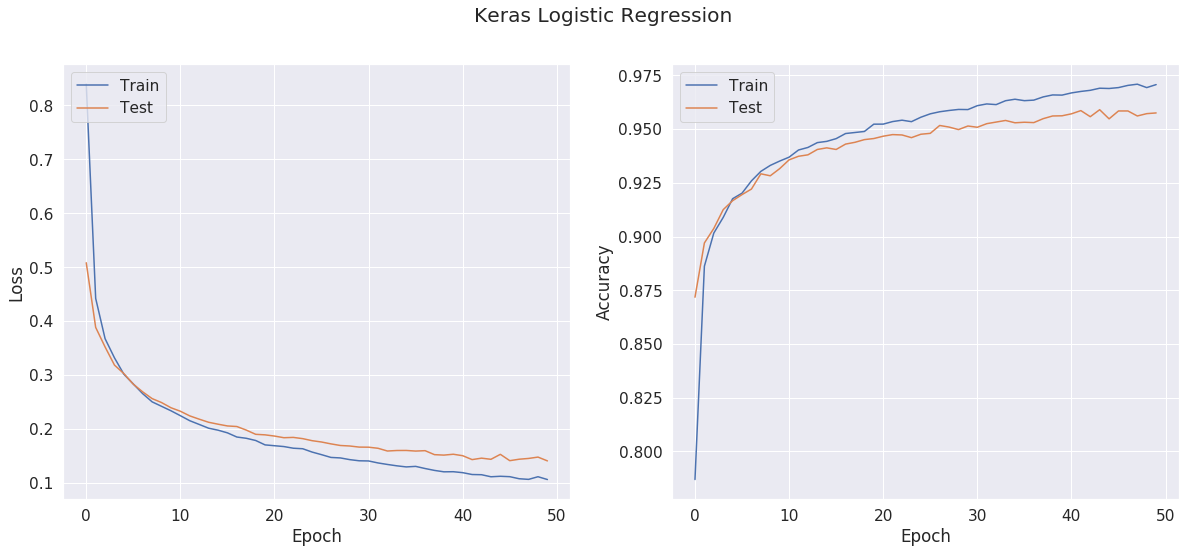

In [17]:
plt.figure(figsize=(20, 8))
plt.suptitle("Keras Logistic Regression")
plt.subplot(121)
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(122)
plt.plot(hist.history["acc"], label="Train")
plt.plot(hist.history["val_acc"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy");

In [18]:
test_eval= model.evaluate(X_test,y_test)
y_predict_MLFNN = np.round(model.predict(X_test),0)
df.loc[len(df)]=['MLFNN', hist.history["acc"][-1],hist.history["loss"][-1],test_eval[1],test_eval[0], hist.history["val_acc"][-1],hist.history["val_loss"][-1]]

10000/10000 [==============================] - 0s 25us/step


In [19]:
df

,Model,Training_accuracy,Training_loss,Test_Accuracy,Test_Loss,Validation_accuracy,Validation_loss
0,Random Forest with Grid SearchCV,1.000000,0.000000,0.9696,0.56070,None,None
1,MLFNN,0.970688,0.106111,0.9594,0.14039,0.9575,0.140684


confusion matrix of MLFNN 
 [[ 972    0    0    1    0    1    3    2    1    0]
 [   2 1121    3    1    1    1    2    1    3    0]
 [  18    2  978    5    5    1    4    8   11    0]
 [  20    0    7  961    0    6    0    6    8    2]
 [  17    1    1    0  938    0    6    1    2   16]
 [  22    2    0   22    3  823   10    1    7    2]
 [  26    3    1    0    4    5  915    0    4    0]
 [  24    9   16    2    1    0    0  968    1    7]
 [  28    4    3    8    5    8    5    2  909    2]
 [  31    5    1    9   19    0    1    7    4  932]] 



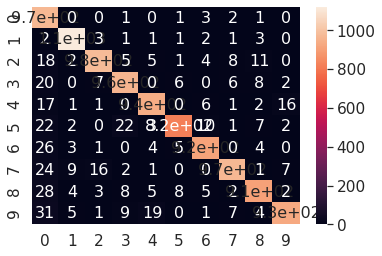

In [20]:
print("confusion matrix of MLFNN \n",confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(y_predict_MLFNN,axis=-1)),"\n")
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(y_predict_MLFNN,axis=-1)), annot=True,annot_kws={"size": 16})

In [21]:
activation_model_MLFNN = models.Model(inputs=model.input,outputs=model.layers[-1].output)
embd_MLFNN = activation_model_MLFNN.predict(X_train)
embd_MLFNN.shape

(48000, 10)

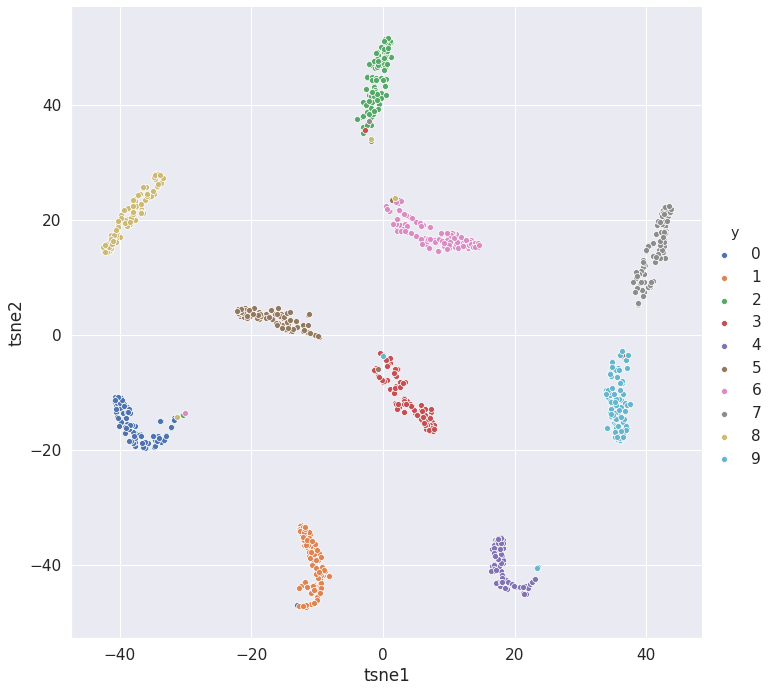

In [23]:
tsne = TSNE(n_components=2)
output_reduced_MLFNN =tsne.fit_transform(embd_MLFNN[:1000])
output_reduced_MLFNN_df = pd.DataFrame(output_reduced_MLFNN,columns=['tsne1','tsne2'])
output_reduced_MLFNN_df['y']=np.argmax(y_train,axis=-1)[:1000]
sns.pairplot(x_vars='tsne1',y_vars='tsne2',data=output_reduced_MLFNN_df,hue='y',height=10)

#### 3. Using CNN

In [24]:
img_rows, img_cols = 28, 28
X_train_CNN = X_train.astype('float32')
X_valid_CNN = X_valid.astype('float32')
X_test_CNN = X_test.astype('float32')
X_train_CNN /= 255
X_valid_CNN /= 255
X_test_CNN /= 255

X_train_CNN = X_train_CNN.reshape(X_train_CNN.shape[0], img_rows, img_cols, 1)
X_valid_CNN = X_valid_CNN.reshape(X_valid_CNN.shape[0], img_rows, img_cols, 1)
X_test_CNN = X_test_CNN.reshape(X_test_CNN.shape[0], img_rows, img_cols, 1)


print(f"X train      shape: {X_train_CNN.shape}, {y_train.shape}")
print(f"X validation shape: {X_valid_CNN.shape},  {y_valid.shape}")
print(f"X test       shape: {X_test_CNN.shape},  {y_test.shape}")

X train      shape: (48000, 28, 28, 1), (48000, 10)
X validation shape: (12000, 28, 28, 1),  (12000, 10)
X test       shape: (10000, 28, 28, 1),  (10000, 10)


In [ ]:
input_shape = (img_rows, img_cols, 1)
filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
model_CNN = Sequential()

In [26]:
model_CNN.add(Convolution2D(filters=filters,kernel_size=kernel_size,padding="valid",input_shape=input_shape))
model_CNN.add(Activation('relu'))
model_CNN.add(Convolution2D(filters=filters, kernel_size=kernel_size,padding="valid"))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=pool_size))
model_CNN.add(Flatten())
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(128, activation="relu"))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation="softmax"))
model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
___

In [27]:
batch_size_CNN = 128
epochs_CNN = 5
hist_CNN = model_CNN.fit(X_train_CNN, y_train, batch_size=batch_size_CNN, epochs=epochs_CNN, validation_data=(X_valid_CNN, y_valid))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3453 - acc: 0.8927 - val_loss: 0.0788 - val_acc: 0.9767
Epoch 2/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.1223 - acc: 0.9629 - val_loss: 0.0526 - val_acc: 0.9844
Epoch 3/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.0946 - acc: 0.9720 - val_loss: 0.0465 - val_acc: 0.9862
Epoch 4/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.0803 - acc: 0.9759 - val_loss: 0.0396 - val_acc: 0.9884
Epoch 5/5
48000/48000 [==============================] - 81s 2ms/step - loss: 0.0685 - acc: 0.9785 - val_loss: 0.0348 - val_acc: 0.9891


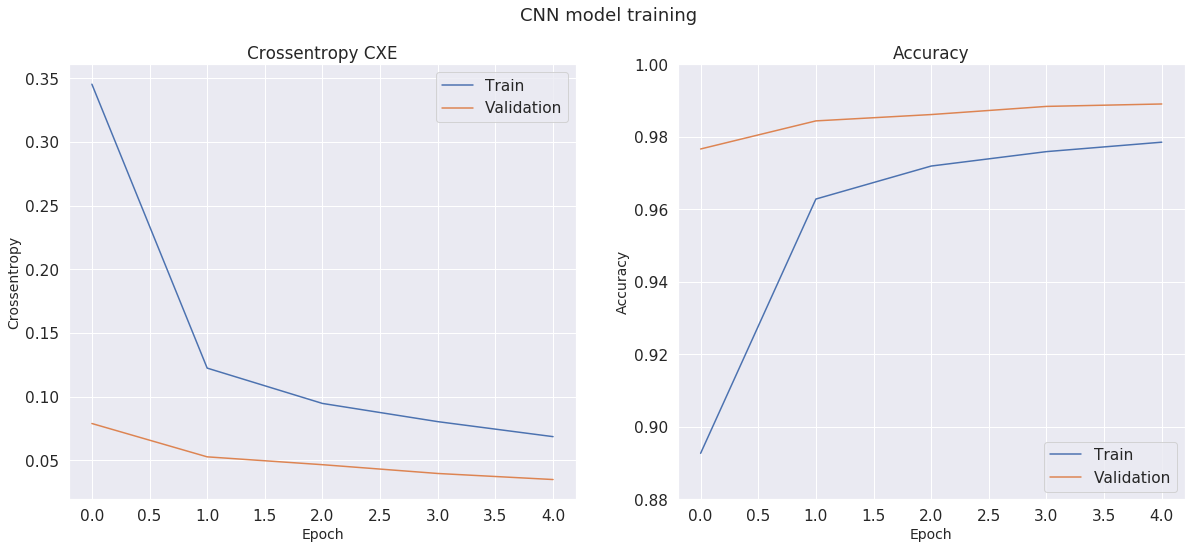

In [28]:
plt.figure(figsize=(20, 8))
plt.suptitle("CNN model training", fontsize=18)
plt.subplot(121)
plt.plot(hist_CNN.history["loss"], label="Train")
plt.plot(hist_CNN.history["val_loss"], label="Validation")
plt.grid("on")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Crossentropy", fontsize=14)
plt.title("Crossentropy CXE")
plt.legend(loc="upper right")
plt.subplot(122)
plt.plot(hist_CNN.history["acc"], label="Train")
plt.grid("on")
plt.plot(hist_CNN.history["val_acc"], label="Validation")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.ylim([0.88, 1.0]);

In [29]:
test_eval_CNN = model_CNN.evaluate(X_test_CNN,y_test)
y_predict_CNN = np.round(model_CNN.predict(X_test_CNN),0)
df.loc[len(df)]=['CNN', hist_CNN.history["acc"][-1],hist_CNN.history["loss"][-1],test_eval_CNN[1],test_eval_CNN[0], hist_CNN.history["val_acc"][-1],hist_CNN.history["val_loss"][-1]]

10000/10000 [==============================] - 5s 476us/step


confusion matrix of CNN 
 [[ 976    0    0    0    0    0    2    1    1    0]
 [   3 1129    1    0    0    0    1    0    1    0]
 [   4    1 1019    3    0    0    0    4    1    0]
 [   1    0    1 1004    0    2    0    1    1    0]
 [   0    0    0    0  975    0    2    0    1    4]
 [   5    0    0    3    0  883    1    0    0    0]
 [  11    2    0    0    1    3  941    0    0    0]
 [   4    1    7    1    0    0    0 1014    1    0]
 [   5    0    1    1    1    1    0    1  961    3]
 [   8    4    0    3    6    3    0    6    4  975]] 



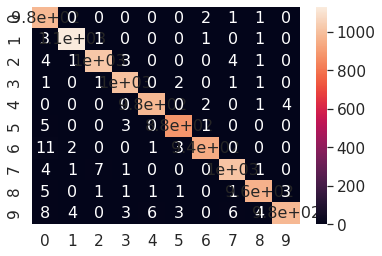

In [30]:
print("confusion matrix of CNN \n",confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(y_predict_CNN,axis=-1)),"\n")
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=-1),np.argmax(y_predict_CNN,axis=-1)), annot=True,annot_kws={"size": 16})

In [31]:
df

,Model,Training_accuracy,Training_loss,Test_Accuracy,Test_Loss,Validation_accuracy,Validation_loss
0,Random Forest with Grid SearchCV,1.000000,0.000000,0.9696,0.560700,None,None
1,MLFNN,0.970688,0.106111,0.9594,0.140390,0.9575,0.140684
2,CNN,0.978542,0.068480,0.9889,0.032567,0.989083,0.0347937


There is significant improvement in generalization error in CNN compartively to MultiLayer Feedforward Neural Network.But the training accuracy are relatively same for both MLFNN and CNN.Random Forest gives significantly higher loss than MLFNN and CNN. Therefore CNN model performs better than other two.

In [36]:
activation_model_CNN = models.Model(inputs=model_CNN.input,outputs=model_CNN.layers[-3].output)
embd_CNN = activation_model_CNN.predict(X_train_CNN)
embd_CNN.shape

(48000, 128)

In [37]:
model_CNN.layers[-3].name

'dense_3'

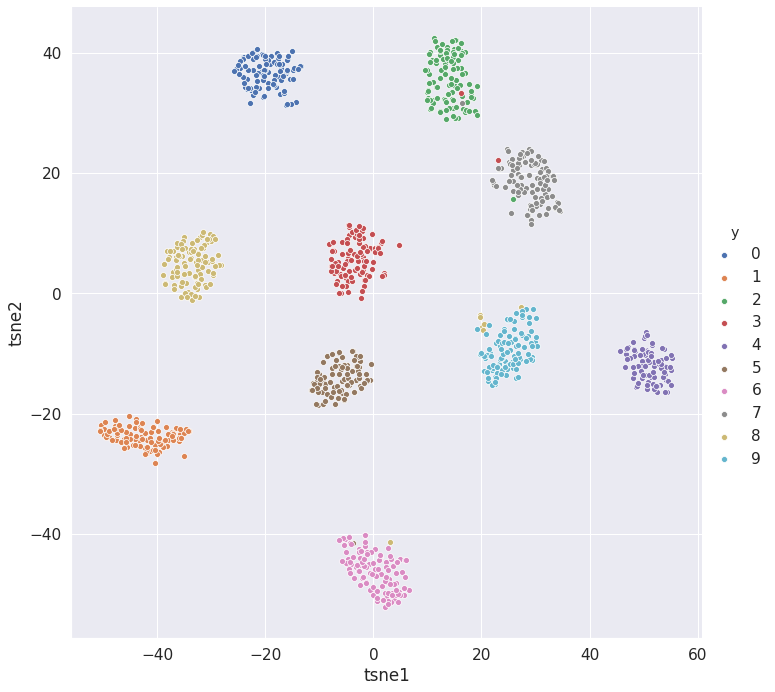

In [39]:
tsne = TSNE(n_components=2)
output_reduced_CNN =tsne.fit_transform(embd_CNN[:1000])
output_reduced_CNN_df = pd.DataFrame(output_reduced_CNN,columns=['tsne1','tsne2'])
output_reduced_CNN_df['y']=np.argmax(y_train,axis=-1)[:1000]
sns.pairplot(x_vars='tsne1',y_vars='tsne2',data=output_reduced_CNN_df,hue='y',height=10)